# Задача 3. Минимизация негладкой функции

1) Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2) Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3) Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4) Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5) Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6) Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [6]:
import numpy as np
import scipy as sc
from scipy.spatial import distance
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

# Решение:
1) Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2) Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

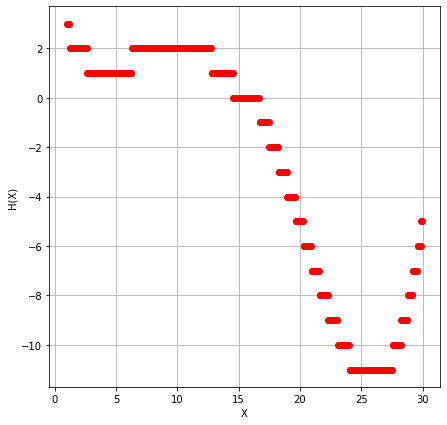

In [8]:
def function_exp(x):
    f_x = np.sin(x/5.0)*np.exp(x/10.0) + 5.0*np.exp(-x/2.0) 
    return f_x

def function_int(y):
    h_y = int(function_exp(y))
    return h_y

# Plot 
x_ideal = list(np.arange(1.0, 30.0, 0.05))
y_ideal = []
#y1 = []
for p in range(len(x_ideal)):
    y_ideal.append(function_int(x_ideal[p]))
    #y1.append(function_w1(x_ideal[p]))
plt.figure(figsize=(7, 7))
plt.plot(x_ideal, y_ideal,'ro')
#plt.plot(x_ideal, y1,'g-')
plt.xlabel('X')
plt.ylabel('H(X)')
plt.grid()
plt.show()

# Решение:
3) Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4) Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [22]:
rez_std = minimize(function_int, 30, method = 'BFGS')
print (rez_std)
stroka_1 = rez_std.fun
print(stroka_1)

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])
-5


In [26]:
x0 = [(1.0, 30.0)]
rez_dm = differential_evolution(function_int, x0)
print(rez_dm)
stroka_2 = rez_dm.fun
print(stroka_2)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 62
     nit: 3
 success: True
       x: array([25.92996496])
-11.0


In [28]:
# Create file
file_submission = open("submission-23.txt", "w+") 
stroka = str(np.round(stroka_1, 2)) +' '+ str(np.round(stroka_2, 2))
print(stroka)
file_submission.write(stroka)
file_submission.close()

-5 -11.0
